In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sklearn.metrics as metrics

In [132]:
#体積×質量
def M0_(v, sigma0):
    val = sigma0*v
    return val

In [133]:
#表面積×体積
def V(x, a, b):
    val = a*x**1.5+b
    return val

In [134]:
#表面積×質量
def M0(x):
    return M0_(V(x))

In [135]:
def MV(input_path, output_path):
    ""
    "質量×体積（密度）関係を出力"
    "インプット：入力/出力パス"
    "アウトプット：密度"
    ""
    #データ読み込み
    data = pd.read_csv(input_path)
    x = data['vol']
    y = data['0']

    #フィッテイング
    popt, pcov = curve_fit(M0_, x, y)
    y_est = M0_(x, popt[0])

    #可視化
    fig = plt.figure(figsize = (8, 5))
    plt.rcParams["font.size"] = 25
    plt.rcParams["font.family"] = "Times New Roman"
    
    plt.scatter(x, y, c = "black")
    plt.plot([i for i in np.arange(min(x), max(x))], [M0_(j, popt[0]) for j in np.arange(min(x), max(x))], c = "black")
    #plt.xlim(0, 40)
    #plt.ylim(0, 30)
    
    plt.xlabel('Volume [$cm^3$]')
    plt.ylabel('Mass [g]')
    plt.title('M-V (density)')
    
    plt.savefig(output_path, bbox_inches='tight')

    return "σ= ", popt[0], "R²= ", metrics.r2_score(y, y_est)

In [136]:
def Vx(input_path, output_path):
    ""
    "堆積×表面積関係を出力"
    "インプット：入力/出力パス"
    "アウトプット："
    ""
    #データ読み込み
    data = pd.read_csv(input_path)
    x = data['s']
    y = data['vol']

    #フィッティング
    popt, pcov = curve_fit(V, x, y)
    y_est = V(x, popt[0], popt[1])

    #可視化
    fig = plt.figure(figsize = (8, 5))
    plt.rcParams["font.size"] = 25
    plt.rcParams["font.family"] = "Times New Roman"
    
    plt.scatter(x, y, c = "black")
    plt.plot(
        [i for i in np.arange(min(x), max(x))], 
        [V(j, popt[0], popt[1]) for j in np.arange(min(x), max(x))], 
        c = "black"
    )
    
    plt.xlabel('Volume [$cm^3$]')
    plt.ylabel('Surface Area [$cm^2$]')
    plt.title('V-x')
    
    plt.savefig(output_path, bbox_inches='tight')
    
    return "a, b= ", popt[0], popt[1], "R²= ", metrics.r2_score(y, y_est)

In [137]:
def Mx(input_path, output_path):
    #データ読み込み
    data = pd.read_csv(input_path)
    x = data['s']
    y = data['0']
    sigma0 = MV(input_path, output_path)[1]
    k_Vx = Vx(input_path, output_path)
    a, b = sigma0*k_Vx[1], sigma0*k_Vx[2]

    #フィッティング
    y_est = [M0(i) for i in x]

    #可視化
    fig = plt.figure(figsize = (8, 5))
    plt.rcParams["font.size"] = 25
    plt.rcParams["font.family"] = "Times New Roman"
    
    plt.scatter(x, y, c = "black")
    plt.plot(
             [i for i in np.arange(min(x), max(x))], 
             [M0(i) for i in np.arange(min(x), max(x))], 
             c = "black"
            )
    
    plt.xlabel('Surface area [$cm^2$]')
    plt.ylabel('Mass [g]')
    
    plt.title('M-x')
    
    plt.savefig(output_path, bbox_inches='tight')
    return "a, b= ", a, b, "R²= ", metrics.r2_score(y, y_est)

In [138]:
#入力/出力ファイルを指定
input_path = r"C:\Users\students\OneDrive\デスクトップ\移動用\修論\csv\raw.csv"
output_path_MV = r"C:\Users\students\OneDrive\デスクトップ\移動用\修論\csv\raw_1.png"
output_path_Vx = r"C:\Users\students\OneDrive\デスクトップ\移動用\修論\csv\raw_2.png"
output_path_Mx = r"C:\Users\students\OneDrive\デスクトップ\移動用\修論\csv\raw_3.png"

0.8529825003320347

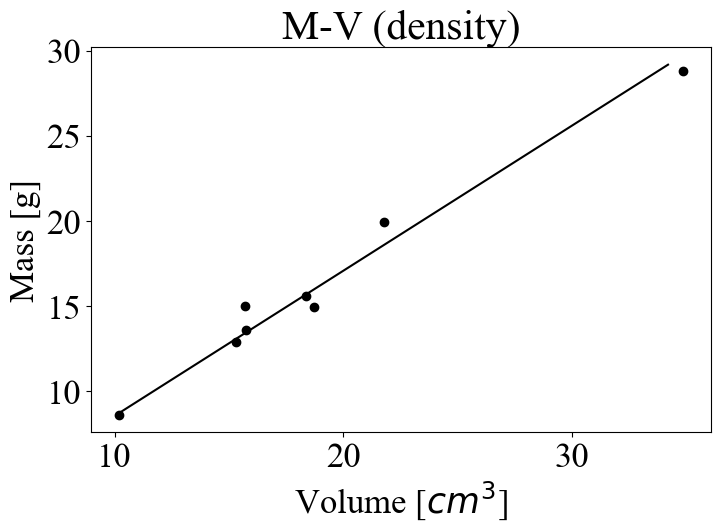

In [131]:
#質量×体積（密度）
sigma0 = MV(
    input_path = input_path,
    output_path = output_path_MV
  )[1]
sigma0

(0.07157012696252271, -2.297495837454418)

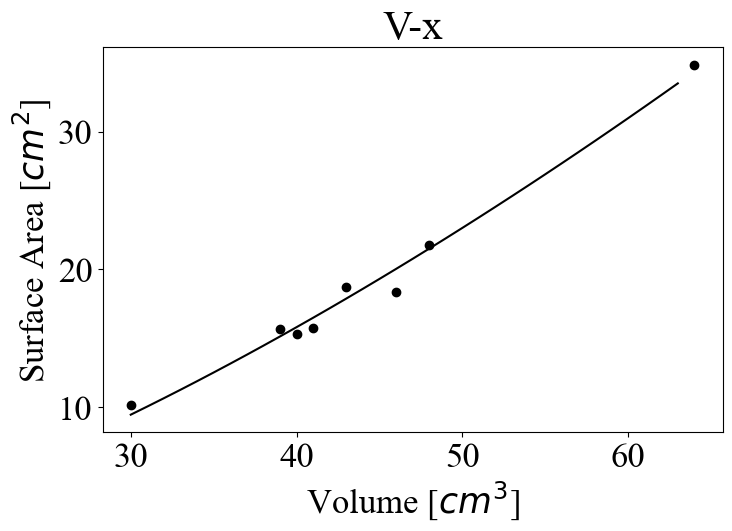

In [128]:
#体積×表面積
val_Vx = Vx(
    input_path = input_path,
    output_path = output_path_Vx
)
a_Vx, b_Vx = val[1], val[2]
a_Vx, b_Vx

(0.0610480658455738, -1.9597237439343114)

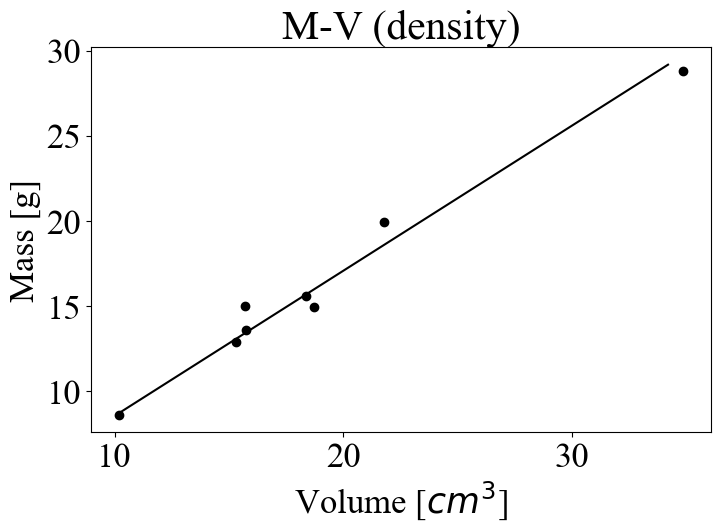

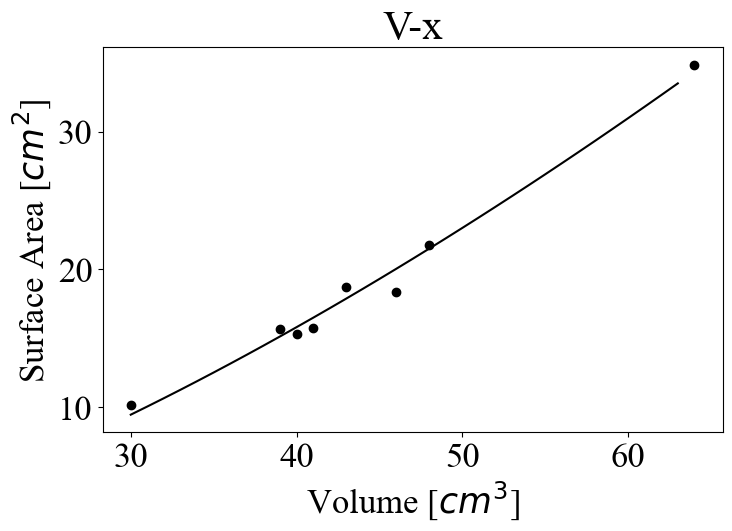

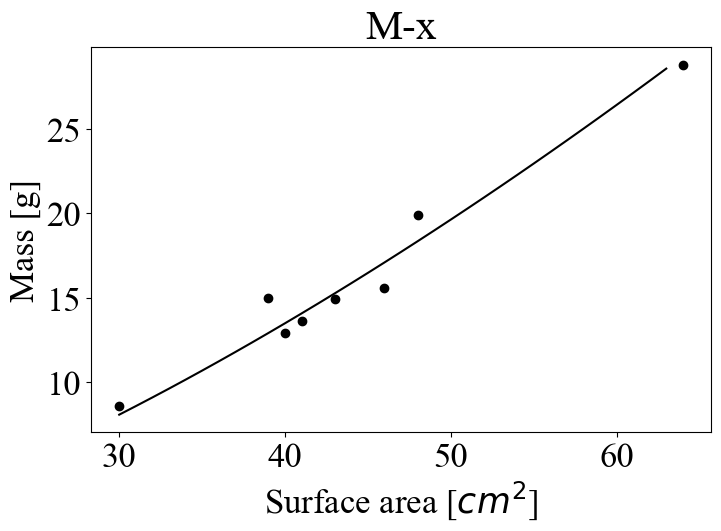

In [129]:
#質量×表面積
val = Mx(
    input_path = input_path,
    output_path = output_path_Mx
  )
a, b = val[1], val[2]
a, b